In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("/content/SaYoPillow.csv")

data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
data.tail()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [4]:
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (630, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [6]:
data.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [8]:
data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [9]:
data.describe(include="all")

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [10]:
data.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [11]:
data['stress_level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

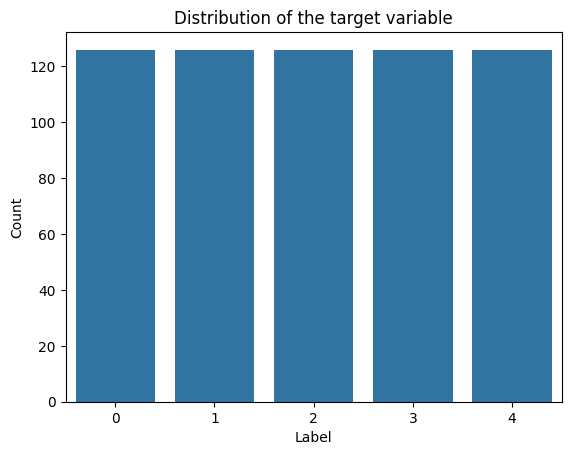

In [12]:
sns.countplot(x='stress_level', data=data)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')
plt.show()

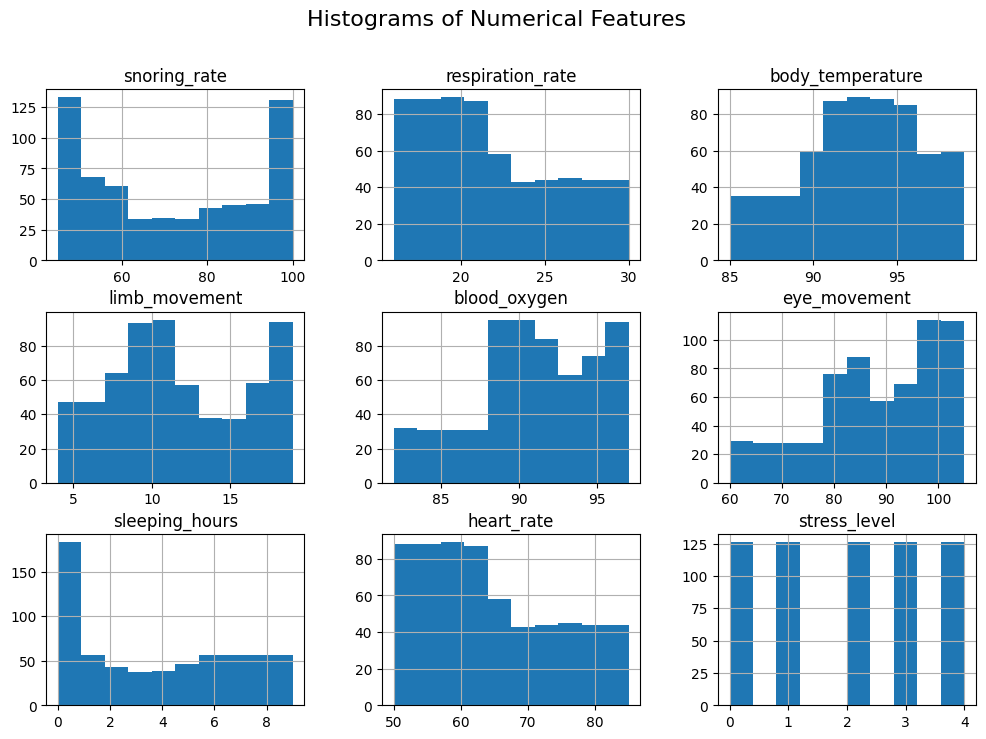

In [13]:
data.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

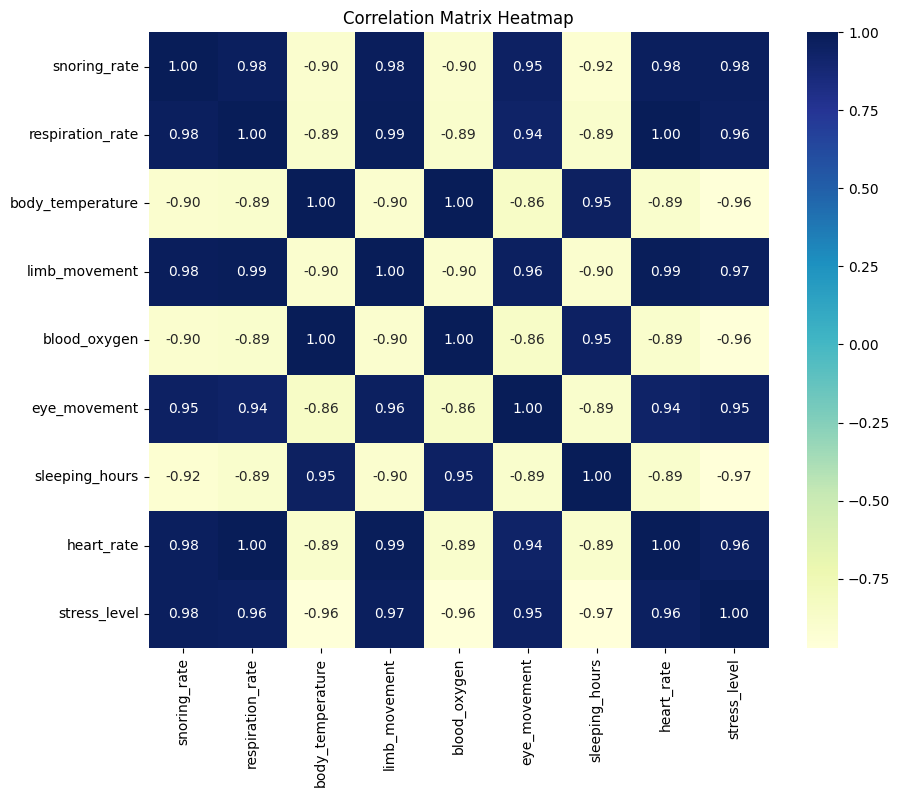

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [16]:
X = data.drop(['stress_level'], axis=1)
y = data['stress_level']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (504, 8)
y_train shape: (504,)
X_test shape: (126, 8)
y_test shape: (126,)


In [18]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [19]:
random_forest.score(X_test,y_test)

0.9841269841269841

In [21]:
y_predict = random_forest.predict(X_test)
report = classification_report(y_test, y_predict)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [22]:
new_data = pd.DataFrame([[90.0, 23.0, 92.0, 15.0, 90.0, 95.0, 2.0, 70.0]], columns=X.columns)

predicted_stress_level = random_forest.predict(new_data)

stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

print("Predicted Stress Label for New Data:",predicted_stress_level[0],"(",predicted_stress_label,")")

Predicted Stress Label for New Data: 3 ( Medium High )


In [26]:
import pickle

with open('your_model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

In [24]:
import pickle

with open('your_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [25]:
new_data = pd.DataFrame([[90.0, 23.0, 92.0, 15.0, 90.0, 95.0, 2.0, 70.0]], columns=X.columns)

predicted_stress_level = loaded_model.predict(new_data)

stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

print("Predicted Stress Label for New Data:",predicted_stress_level[0],"(",predicted_stress_label,")")

Predicted Stress Label for New Data: 3 ( Medium High )
